<h1 style="color:red; font-size:40px; text-align:center;"> Regression Analysis </h1>

The goal of regression analysis is to describe the relationship between one set of variables called the dependent variables, and another set of variables, called independent or explanatory variables. 

When there is only one explanatory variable, it is called simple regression.


## Objectives


-   Import Libraries
-   Regression analysis in place of the t-test
-   Regression analysis in place of ANOVA
-   Regression analysis in place of correlation


* * *


## Import Libraries


In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install statsmodels

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [6]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df = pd.read_csv(ratings_url)


## Lab Exercises


Lets run regression analysis in place of the t-test, ANOVA, and correlation


### Regression with T-test: Using the teachers rating data set, does gender affect teaching evaluation rates?


Initially, we had used the t-test to test if there was a statistical difference in evaluations for males and females, we are now going to use regression. We will state the null hypothesis:

-   $H_0: β1$ = 0 (Gender has no effect on teaching evaluation scores)
-   $H_1: β1$ is not equal to 0 (Gender has an effect on teaching evaluation scores)


We will use the female variable. As we see in our Dataset; female = 1 and male = 0

In [8]:
ratings_df["female"][0]

1

In [4]:
## X is the input variables (or independent variables)
X = ratings_df['female']
## y is the target/dependent variable
y = ratings_df['eval']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     10.56
Date:                Sat, 23 Jan 2021   Prob (F-statistic):            0.00124
Time:                        23:17:41   Log-Likelihood:                -378.50
No. Observations:                 463   AIC:                             761.0
Df Residuals:                     461   BIC:                             769.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0690      0.034    121.288      0.000       4.003       4.135
female        -0.1680      0.052     -3.250      0.001      -0.270      -0.066
==============================================================================
Omnibus:                       17.625   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.970
Skew:                          -0.496   Prob(JB):                     7.60e-05
Kurtosis:                       2.981   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in mean evaluation scores based on gender. The coefficient -0.1680 means that females get 0.168 scores less than men.


### Regression with ANOVA: Using the teachers' rating data set, does beauty  score for instructors  differ by age?


State the Hypothesis:

-   $H_0: µ1 = µ2 = µ3$ (the three population means are equal)
-   $H_1:$ At least one of the means differ


Then we group the data like we did with ANOVA


In [9]:
ratings_df.loc[(ratings_df['age'] <= 40), 'age_group'] = '40 years and younger'
ratings_df.loc[(ratings_df['age'] > 40)&(ratings_df['age'] < 57), 'age_group'] = 'between 40 and 57 years'
ratings_df.loc[(ratings_df['age'] >= 57), 'age_group'] = '57 years and older'

Use OLS function from the statsmodel library


In [10]:
from statsmodels.formula.api import ols
lm = ols('beauty ~ age_group', data = ratings_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df      sum_sq    mean_sq          F        PR(>F)
age_group    2.0   20.422744  10.211372  17.597559  4.322549e-08
Residual   460.0  266.925153   0.580272        NaN           NaN


**Conclusion:** We can also see the same values for ANOVA like before and we will reject the null hypothesis since the p-value is less than 0.05 there is significant evidence that at least one of the means differ.


### Regression with ANOVA option 2


Create dummy variables - A dummy variable is a numeric variable that represents categorical data, such as gender, race, etc. Dummy variables are dichotomous, i.e they can take on only two quantitative values.


In [11]:
X = pd.get_dummies(ratings_df[['age_group']])

In [17]:
X[:3]

,age_group_40 years and younger,age_group_57 years and older,age_group_between 40 and 57 years
0,1,0,0
1,1,0,0
2,1,0,0


In [18]:
y = ratings_df['beauty']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 beauty   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     17.60
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           4.32e-08
Time:                        23:25:20   Log-Likelihood:                -529.47
No. Observations:                 463   AIC:                             1065.
Df Residuals:                     460   BIC:                             1077.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0138      0.028      0.496      0.620      -0.041       0.069
age_group_40 years and younger        0.3224      0.058      5.574      0.000       0.209       0.436
age_group_57 years and older         -0.2596      0.056     -4.621      0.000      -0.370      -0.149
age_group_between 40 and 57 years    -0.0489      0.045     -1.081      0.280      -0.138       0.040
==============================================================================
Omnibus:                       11.586   Durbin-Watson:                   0.434
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.114
Skew:                           0.394   Prob(JB):                      0.00234
Kurtosis:                       2.913   Cond. No.                     6.62e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.46e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

You will get the same results and conclusion


### Correlation: Using the teachers' rating dataset, Is teaching evaluation score correlated with beauty score?


In [19]:
## X is the input variables (or independent variables)
X = ratings_df['beauty']
## y is the target/dependent variable
y = ratings_df['eval']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           4.25e-05
Time:                        23:25:55   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             754.6
Df Residuals:                     461   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9983      0.025    157.727      0.000       3.948       4.048
beauty         0.1330      0.032      4.133      0.000       0.070       0.196
==============================================================================
Omnibus:                       15.399   Durbin-Watson:                   1.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.405
Skew:                          -0.453   Prob(JB):                     0.000274
Kurtosis:                       2.831   Cond. No.                         1.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** p < 0.05 there is evidence of correlation between beauty and evaluation scores


## Practice Questions


### Question 1: Using the teachers' rating data set, does tenure affect beauty scores?

-   Use α = 0.05


- Null Hypothesis: Mean beauty scores for tenured and non-tenured instructors are equal
- Alternative Hypothesis: There is a difference in mean beauty scores for tenured and non-tenured instructors

In [22]:
X = ratings_df['tenured_prof']

In [23]:
y = ratings_df['beauty']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 beauty   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1689
Date:                Sat, 23 Jan 2021   Prob (F-statistic):              0.681
Time:                        23:28:17   Log-Likelihood:                -546.45
No. Observations:                 463   AIC:                             1097.
Df Residuals:                     461   BIC:                             1105.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0284      0.078      0.363      0.717      -0.125       0.182
tenured_prof    -0.0364      0.089     -0.411      0.681      -0.210       0.138
==============================================================================
Omnibus:                       23.184   Durbin-Watson:                   0.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.229
Skew:                           0.507   Prob(JB):                     9.03e-06
Kurtosis:                       2.583   Cond. No.                         4.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-value is greater than 0.05, so we fail to reject the null hypothesis as there is no evidence that the mean difference of tenured and untenured instructors are different


### Question 2: Using the teachers' rating data set, does being an English speaker affect the number of students assigned to professors?

-   Use "allstudents"
-   Use α = 0.05 and α = 0.1 


- Null Hypothesis: Mean number of students assigned to native English speakers vs non-native English speakers are equal
- Alternative Hypothesis: There is a difference in mean number of students assigned to native English speakers vs non-native English speakers

In [28]:
import seaborn as sns

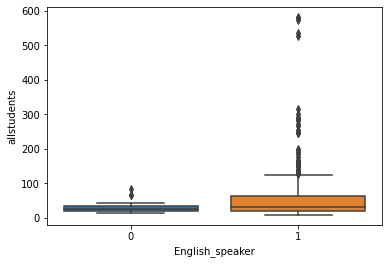

In [32]:
ax = sns.boxplot(x='English_speaker', y='allstudents', data=ratings_df)

In [33]:
X = ratings_df['English_speaker']
y = ratings_df['allstudents']

In [25]:
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 beauty   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1689
Date:                Sat, 23 Jan 2021   Prob (F-statistic):              0.681
Time:                        23:30:04   Log-Likelihood:                -546.45
No. Observations:                 463   AIC:                             1097.
Df Residuals:                     461   BIC:                             1105.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0284      0.078      0.363      0.717      -0.125       0.182
tenured_prof    -0.0364      0.089     -0.411      0.681      -0.210       0.138
==============================================================================
Omnibus:                       23.184   Durbin-Watson:                   0.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.229
Skew:                           0.507   Prob(JB):                     9.03e-06
Kurtosis:                       2.583   Cond. No.                         4.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



At α = 0.05, p-value is greater, we fail to reject the null hypothesis as there is no evidence that being a native English speaker or a non-native English speaker affects the number of students assigned to an instructor.
At α = 0.1, p-value is less, we reject the null hypothesis as there is evidence that there is a significant difference of mean number of students assigned to native English speakers vs non-native English speakers.



### Question 3: Using the teachers' rating data set, what is the correlation between the number of students who participated in the evaluation survey and evaluation scores?

-   Use "students" variable


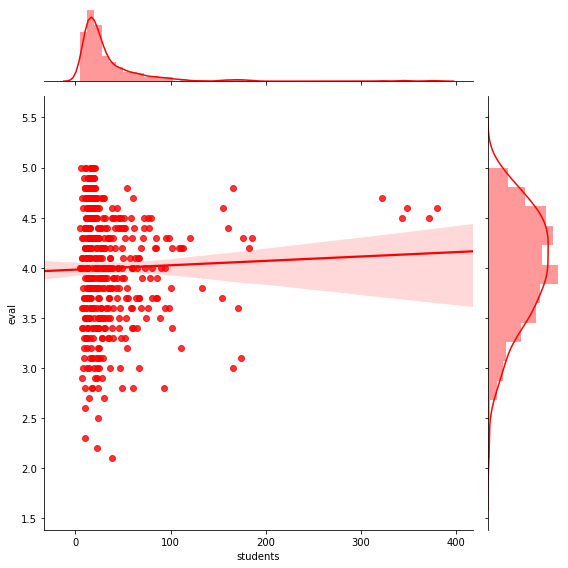

In [39]:
sns.jointplot(ratings_df['students'],ratings_df['eval'],data=ratings_df, kind="reg",color="r",height=8)

In [34]:
X = ratings_df['students']
y = ratings_df['eval']


In [35]:
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5806
Date:                Sat, 23 Jan 2021   Prob (F-statistic):              0.446
Time:                        23:34:50   Log-Likelihood:                -383.46
No. Observations:                 463   AIC:                             770.9
Df Residuals:                     461   BIC:                             779.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9823      0.033    119.689      0.000       3.917       4.048
students       0.0004      0.001      0.762      0.446      -0.001       0.002
==============================================================================
Omnibus:                       15.259   Durbin-Watson:                   1.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.283
Skew:                          -0.456   Prob(JB):                     0.000291
Kurtosis:                       2.888   Cond. No.                         74.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-square is 0.001, R will be √0.001, correlation coefficient is 0.03 (close to 0). There is a very weak correlation between the number of students who participated in the evaluation survey and evaluation scores

**The End**